In [1]:
!pip install opencv-python
!pip install tensorflow
!pip install imblearn

In [2]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow as tf

### set the labels

In [3]:
emotions = ["angry","fear","happy","neutral","sad","surprise"]

#### path for training data

In [4]:
dataset_dir = "./train"

### visualizing the data

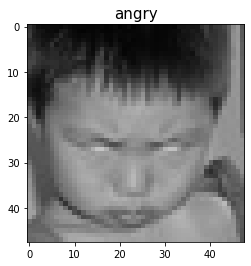

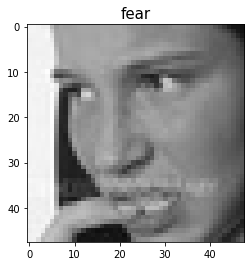

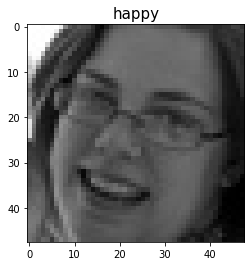

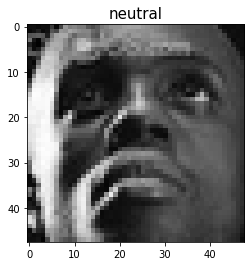

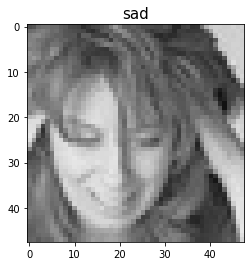

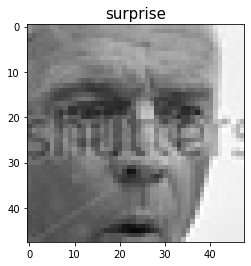

In [5]:
for emotion in emotions:
    path = os.path.join(dataset_dir,emotion)
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img))
        plt.imshow(cv.cvtColor(img_array,cv.COLOR_BGR2RGB))
        plt.title(emotion, fontsize=15)
        plt.show()
        break        

## read through all the images and converting them to array

In [6]:
training_data = []

def create_training_data():
    for emotion in emotions:
        path = os.path.join(dataset_dir,emotion)
        class_label = emotions.index(emotion)
        for img in os.listdir(path):
            img_array = cv.imread(os.path.join(path,img))
            training_data.append([img_array,class_label])
            

In [7]:
create_training_data()

In [8]:
print(len(training_data))

28273


In [9]:
import random
random.shuffle(training_data)

### Creating the features and labels

In [10]:
X = [] ##feature
y = [] ##labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,48,48,3)

### Preprocessing

In [11]:
X.shape

(28273, 48, 48, 3)

In [12]:
X = X.astype(np.uint8)
X.dtype

dtype('uint8')

In [13]:
len(y)

28273

In [14]:
y = np.array(y)

In [15]:
y = y.astype(np.uint8)
y.dtype

dtype('uint8')

In [16]:
y[:5]

array([0, 4, 2, 2, 0], dtype=uint8)

In [17]:
X_rescaled = X/255
X_rescaled[:5]

array([[[[0.34509804, 0.34509804, 0.34509804],
         [0.44705882, 0.44705882, 0.44705882],
         [0.59607843, 0.59607843, 0.59607843],
         ...,
         [0.31372549, 0.31372549, 0.31372549],
         [0.20392157, 0.20392157, 0.20392157],
         [0.18431373, 0.18431373, 0.18431373]],

        [[0.29803922, 0.29803922, 0.29803922],
         [0.40784314, 0.40784314, 0.40784314],
         [0.5254902 , 0.5254902 , 0.5254902 ],
         ...,
         [0.2745098 , 0.2745098 , 0.2745098 ],
         [0.18823529, 0.18823529, 0.18823529],
         [0.18431373, 0.18431373, 0.18431373]],

        [[0.27843137, 0.27843137, 0.27843137],
         [0.39607843, 0.39607843, 0.39607843],
         [0.40392157, 0.40392157, 0.40392157],
         ...,
         [0.23529412, 0.23529412, 0.23529412],
         [0.18039216, 0.18039216, 0.18039216],
         [0.18039216, 0.18039216, 0.18039216]],

        ...,

        [[0.02745098, 0.02745098, 0.02745098],
         [0.01568627, 0.01568627, 0.01568627]

## Model Creation and Training

In [18]:
from tensorflow import keras

In [35]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3),activation='relu', padding='same',input_shape=(48, 48,3)),
    keras.layers.Conv2D(32, (3,3),activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, (5,5),activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(128, (5,5),activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(emotions), activation='softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics='accuracy')

model.fit(X_rescaled,y,epochs=50)

Epoch 1/50
884/884 [==============================] - 9s 9ms/step - loss: 1.5899 - accuracy: 0.3625
Epoch 2/50
884/884 [==============================] - 8s 9ms/step - loss: 1.3142 - accuracy: 0.4810
Epoch 3/50
884/884 [==============================] - 8s 9ms/step - loss: 1.1956 - accuracy: 0.5333
Epoch 4/50
884/884 [==============================] - 8s 9ms/step - loss: 1.1118 - accuracy: 0.5722
Epoch 5/50
884/884 [==============================] - 8s 9ms/step - loss: 1.0472 - accuracy: 0.5998
Epoch 6/50
884/884 [==============================] - 8s 9ms/step - loss: 0.9748 - accuracy: 0.6279
Epoch 7/50
884/884 [==============================] - 8s 9ms/step - loss: 0.9139 - accuracy: 0.6542
Epoch 8/50
884/884 [==============================] - 8s 9ms/step - loss: 0.8540 - accuracy: 0.6802
Epoch 9/50
884/884 [==============================] - 8s 9ms/step - loss: 0.7860 - accuracy: 0.7052
Epoch 10/50
884/884 [==============================] - 8s 9ms/step - loss: 0.7429 - accuracy: 0.7216

## Creating Test Dataset

In [20]:
dataset_test_dir = "./test"

In [21]:
test_data = []

def create_test_data():
    for emotion in emotions:
        path = os.path.join(dataset_test_dir,emotion)
        class_label = emotions.index(emotion)
        for img in os.listdir(path):
            img_array = cv.imread(os.path.join(path,img))
            test_data.append([img_array,class_label])

In [22]:
create_test_data()

In [23]:
print(len(test_data))

7067


In [24]:
random.shuffle(test_data)

In [25]:
X_test = [] ##feature
y_test = [] ##labels

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1,48,48,3)

X_test = X_test.astype(np.uint8)
X_test.dtype

dtype('uint8')

In [26]:
y_test = np.array(y_test)
y_test = y_test.astype(np.uint8)
y_test.dtype

dtype('uint8')

In [27]:
X_test_rescaled = X_test/255
X_test_rescaled[:5]

array([[[[0.39215686, 0.39215686, 0.39215686],
         [0.25490196, 0.25490196, 0.25490196],
         [0.14117647, 0.14117647, 0.14117647],
         ...,
         [0.12941176, 0.12941176, 0.12941176],
         [0.16470588, 0.16470588, 0.16470588],
         [0.19215686, 0.19215686, 0.19215686]],

        [[0.42352941, 0.42352941, 0.42352941],
         [0.21568627, 0.21568627, 0.21568627],
         [0.17647059, 0.17647059, 0.17647059],
         ...,
         [0.13333333, 0.13333333, 0.13333333],
         [0.15686275, 0.15686275, 0.15686275],
         [0.17254902, 0.17254902, 0.17254902]],

        [[0.30980392, 0.30980392, 0.30980392],
         [0.17254902, 0.17254902, 0.17254902],
         [0.16862745, 0.16862745, 0.16862745],
         ...,
         [0.14117647, 0.14117647, 0.14117647],
         [0.14901961, 0.14901961, 0.14901961],
         [0.14901961, 0.14901961, 0.14901961]],

        ...,

        [[0.14509804, 0.14509804, 0.14509804],
         [0.14509804, 0.14509804, 0.14509804]

In [36]:
y_test[:10]

array([0, 2, 0, 2, 2, 0, 3, 2, 3, 1], dtype=uint8)

In [37]:
y_pred = model.predict(X_test_rescaled)

In [38]:
y_pred_final= []
for i in range(len(y_pred)):
    y_pred_final.append(np.argmax(y_pred[i]))

In [39]:
y_pred_final[:10]

[0, 2, 0, 2, 3, 0, 3, 0, 2, 1]

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [40]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.51      0.55      0.53       958
           1       0.56      0.39      0.46      1024
           2       0.82      0.81      0.82      1774
           3       0.56      0.59      0.57      1233
           4       0.49      0.53      0.51      1247
           5       0.74      0.79      0.77       831

    accuracy                           0.63      7067
   macro avg       0.61      0.61      0.61      7067
weighted avg       0.63      0.63      0.62      7067



Text(69.0, 0.5, 'Truth')

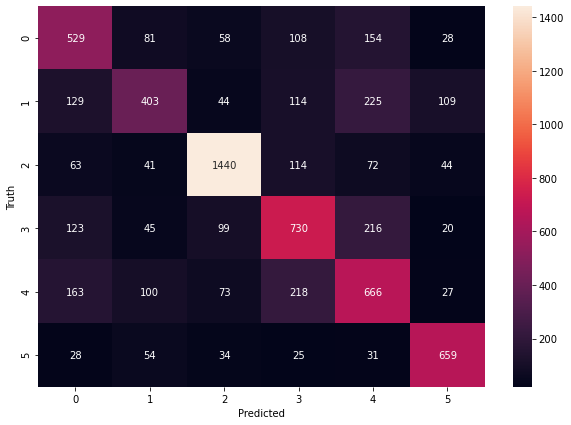

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_final)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')